# SNLP Assignment 4

Name 1: Parnian  Jahangirirad  
Student id 1: 7062810   
Email 1: paja00003@stud.uni-saarland.de  



**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the respective Python files for any additional exercises necessary. There is no need to submit the data files should they exist. <br>

Upload the zipped folder on CMS. Please follow the naming convention of **Name1_studentID1_Name2_studentID2_Name3_studentID3.zip**. Only one member of the group should make the submisssion.

---

# 1. Code (Theory) (1 Point)

**1.1 (0.25 points)** Look at the lecture slides of chapter 4 (p. 26 - 36) and nicely write down the formulae in the following Markdown cell for these three:
- Kraft's inequality 
- expected length per word after encoding
- optimal length of code words

**1.2 (0.25 points)** What is a prefix code and how does it relate to Kraft’s inequality?

**1.3 (0.5 points)** Show mathematically that every prefix code with fixed-length satisfies Kraft's inequality. Explain.

### Answers 1.1 - 1.3:  
#### 1.1:  
- Kraft's inequality:  
$\sum_{i=1}^{m} D^{-i} \leq 1$  
where $D$ is the base of the code and $l_{i}$ is code word length of word i  
- Expected length per word after encoding:  
$L = \sum_{i} l_{i}p(w_{i})$  
- Optimal length of code words  
$L^{*} = \sum_{i} l_{i}p(w_{i}) + \lambda \sum_{i} (D^{-l_{i}} - 1)$
#### 1.2:  
Prefix code is a kind of mapping of words $w_{i}$ to finite strings of a D-nary alphabet, which no code word is prefix of another code word.  
For each length distribution that satisfies Kraft's inequality there is a prefix code.  

#### 1.3:  
![](exe1.3.jpg)


# 2. Code (practical exercise) (3 Points)

**2.1 (2 points)** Read up on *`Shannon–Fano coding`* on Wikipedia (https://en.wikipedia.org/wiki/Shannon-fano) and implement the algorithm that is described in the section *`Fano's code: binary splitting`*. Feel free to use the example from the lecture to check your implementation for correctness:

| word | frequency | $$C(\text{word})$$ |
| ---- | --------- | ------- |
|"the" | 0.5       | `0`     |
|"and" | 0.25      | `10`    |
|"of"  | 0.125     | `110`   |
|"he"  | 0.125     | `111`   |

**2.2 (0.5 points)** Load the text file `alice_eng.txt` and preprocess it by lowercasing, removing punctuation and tokenizing the words by whitespaces. Now take the first 500 words of that corpus and run your implementation of Shannon-Fano encoding on it. Compute and print out the average amount of bits per word.

**2.3 (0.5 points)** Explain the differences between Shannon-Fano coding and Huffman coding. Provide an example where Huffman coding is more efficient.

### 2.1:

In [2]:
### TODO:
def split(symbols):
    symbols_keys = list(symbols.keys())
    symbols_values = list(symbols.values())
    total_prob = sum(prob for prob in symbols_values)
    cumulative_prob = 0
    for i, (symbol, prob) in enumerate(symbols.items()):
        cumulative_prob += prob
        if cumulative_prob >= total_prob / 2:
            s1 = dict(zip(symbols_keys[:i+1], symbols_values[:i+1]))
            s2 = dict(zip(symbols_keys[i+1:], symbols_values[i+1:]))
            #print(s1)
            #print(s2)
            return s1, s2
    

def encoder(symbols,code_prefix, code_dict):
    if len(symbols) == 1:
        #print(symbols)
        #print("********")
        symbol = list(symbols.keys())
        code_dict[symbol[0]] = code_prefix
        #print(code_dict)
        return code_dict
    left_group, right_group = split(symbols)
    encoder(left_group, code_prefix + '0', code_dict)
    encoder(right_group, code_prefix + '1', code_dict)
    #return after all recursive calls
    return code_dict


def get_encoding(symbols: dict, base: int = 2) -> dict:
    """ Generate a prefix encoding for each of the symbols

    Args:
    alphabet - a dictionary that holds in its keys the alphabet item and
                its relative frequency as the value, e.g. {'a': 0.5, 'b': 0.5}
    base - an `int` that represents the base of the code. Feel free to make
            your implementation open to other bases. For the purpose of this
            exercise, using only base `2`, i.e. binary code, suffices.

    Returns a `dict` with alphabet items in its keys and the encoding as the
    values, e.g. {'a': '0', 'b': '1'}
    """
    #sorting symbols in decreasing order based on frequencies
    sorted_symbols = dict(sorted(symbols.items(), key=lambda item: item[1], reverse=True))
    code_dict = {}
    code_dict = encoder(sorted_symbols, '',code_dict)
    #print("code_dict is :",code_dict)
    return code_dict   
    
    raise NotImplementedError
    
print(get_encoding({"the": 0.5, "and": 0.25, "of": 0.125, "he": 0.125}))

{'the': '0', 'and': '10', 'of': '110', 'he': '111'}


### 2.2:

In [3]:
### TODO
from nltk.tokenize import RegexpTokenizer
from collections import Counter
def preprocessing(filepath):
    #load the text
    with open(filepath, 'r', encoding='utf_8') as file:
        text = file.read()

    #lowercasing
    text = text.lower()

    #tokenizing and removing punctuations
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    #print("type of tokens is: ",type(tokens))
    return tokens


tokens = preprocessing('./data/alice_eng.txt')
#first 500 words
words = tokens[:500]

num_words = Counter(words)
total_num = sum(num_words.values())
word_prob_dict = {word:freq/total_num for word,freq in num_words.items()}

code_dict = get_encoding(word_prob_dict)
#print(code_dict)
#print('********************************')
#Average amounts of bits per word
average_bits = (sum(len(code_dict[word]) * freq for word,freq in num_words.items()))/total_num
print(f"Average amount of bits per word: {average_bits}")



Average amount of bits per word: 7.34


### Answer 2.3:
Shannon-Fano coding recursively splits the list of words in to two parts with approximate equal total frequency probabilities.  
Huffman coding creates a leaf node for each word and adds it to the priority queue based on the word's probability. Huffman coding always generates a coding with optimal length distribution, but it is not always the case with the Shannon-Fano coding. Let's look at an example:  
{'A':0.4, 'B':0.35, 'C':0.2, 'D':0.05}
We will calculate the average code length for both methods. Fist for Shannon-Fano coding:  

---

In [4]:
example = {'A':0.4, 'B':0.35, 'C':0.2, 'D':0.05}
total_prob = sum(example.values())
example_code_dict = get_encoding(example)
example_average_bits = (sum(len(example_code_dict[word]) * freq for word,freq in example.items()))/total_prob
print(f"Average amount of bits per word: {example_average_bits}")


Average amount of bits per word: 2.0


And then Huffman coding:  
![](exe2.3.jpg)

# 3. Perplexity Calculations (3 Points)

You are given a vocabulary of three words $w_1, w_2, w_3$ and a language model that assigns probabilities to these words:<br>
| word | $$p(w_i)$$ |
| ---- | --------- |
|$$w_1$$ | $$0.2$$       |
|$$w2$$ | $$0.5$$      |
|$$w3$$  | $$0.3$$     |

**3.1 (0.25 points)** Calculate the entropy.

**3.2 (0.25 points)** Calculate the perplexity.

**3.3 (1 point)** Write down the Lagrangian function that minimizes the entropy under the constraint that the probabilities sum up to 1.

$$L(p_1, p_2, p_3, λ) = $$

**3.4 (1 point)** Write down the four partial derivatives and set them to zero. Calculate the result for the optimized probabilities.

**3.5 (0.5 points)** Now compute the perplexity for the optimized probabilities. Explain the result.

### Answers 3.1 - 3.5:  
#### 3.1 & 3.2  


---

In [10]:
import math
def compute_entropy(prob_dict):
    entropy = 0
    for prob in prob_dict.values():
        entropy -= prob * math.log2(prob) if prob > 0 else 0
    
    return entropy

def compute_perplexity(entropy):
    return 2**entropy

word_dict = {'w1':0.2, 'w2':0.5, 'w3':0.3}
entropy = compute_entropy(word_dict)
print("entropy: ",entropy)
print("perplexity: ",compute_perplexity(entropy))

entropy:  1.4854752972273344
perplexity:  2.8000940728538315


#### 3.3:  
![](exe3.3.jpg)

#### 3.4:  
![](exe3.3-part1.jpg)
![](exe3.3-part2.jpg)

In [11]:
#compute perplexity when p1=p2=p3= 1/3
word_dict = {'w1':0, 'w2':0, 'w3':1}
entropy = compute_entropy(word_dict)
print(entropy)
print("perplexity: ",compute_perplexity(entropy))

0.0
perplexity:  1.0


By minimizing the lagrangian function, we also reached the minimum perplexity, which is 1.  

# 4. OOVs (3 points)

**4.1 (0.25 points)** What are out-of-vocabulary words (OOVs)?

**4.2 (0.25 points)** How does perplexity behave with words that are less frequent?

**4.3 (0.25 points)** Show mathematically what would happen to the perplexity if a symbol in the test set is an OOV. In this case, assume a probability of $0^+$.

**4.4 (0.25 points)** Load the Penn Treebank in NLTK (based on the WSJ corpus), preprocess it by lowercasing and removing punctuation, and then perform a 70:30 train:test split.

The go-to solution for modelling OOVs in the N-gram setting is to introduce a new `<unk>` token in the vocabulary for all unknown words. The `<unk>` token replaces all OOVs and is then modeled like a normal word. 

**4.5 (0.5 points)** Your task is to complete the function to create a vocabulary with the top_n most frequent words in the train set.

**4.6 (0.5 points)** Complete the function that restricts a corpus into the given vocabulary, i.e. all OOVs will be replaced with `<unk>`.

**4.7 (0.5 points)** Plot the OOV-rates (see chapter 5 p. 5) for the train and test set with increasing size of the vocabulary (use a log-log scale). What do you observe?

**4.8 (0.5 points)** Plot the perplexity for the train and test set with increasing size of the vocabulary. What do you observe?

### Answers 4.1 - 4.3:  
#### 4.1:  
Out of vocabulary words are words that are not present in the language's vovabulary.  
#### 4.2:  
Perplexity increases with less frequent words.  
#### 4.3:  
![](exe4.3.jpg) 





### Your Code for 4.4 - 4.6:

In [22]:
import nltk
nltk.download('treebank')
from nltk.corpus import treebank
import string
from collections import Counter
### TODO

def load_and_preprocess_data() -> list[list[str]]:
    ''' Function that loads the WSJ dataset, removes punctuation and lowercases the tokens
    Output: the preprocessed corpus - list[list[str]]'''
    sentences = treebank.sents()
    preprocessed_sents = []
    for sentence in sentences:
        #lowercasing
        sentence = [word.lower() for word in sentence]
        #removing punctuations
        sentence = [word for word in sentence if word not in string.punctuation]
        preprocessed_sents.append(sentence)

    return preprocessed_sents
    raise NotImplementedError

def train_test_split(corpus: list[list[str]]) -> (list[list[str]], list[list[str]]):
    '''Splits the corpus using a 70:30 ratio. Do not randomize anything here. use the original order
    Input: corpus - list[list[str]]
    Output: tuple of train and test set - list[list[str]], list[list[str]]'''
    index = int(len(corpus) * 0.7)
    train_set = corpus[:index]
    test_set = corpus[index:]
    return train_set, test_set
    raise NotImplementedError
    
def make_vocab(corpus: list[list[str]], top_n: int) -> set:
    '''Make the top_n frequent vocabulary from a corpus
    Input: corpus - list[list[str]]
         top_n  - int
    Output: the vocabulary - set of words'''
    words = [word for sentence in corpus for word in sentence]

    words_count = Counter(words)
    top_n_words = words_count.most_common(top_n)
    #print(top_n_words)
    #print("*********************")
    top_n_set = set(word for word,count in top_n_words)
    return top_n_set
    raise NotImplementedError
    
def restrict_vocab(corpus: list[list[str]], vocab: set) -> list[list[str]]:
    '''Make the corpus fit inside the vocabulary using <unk>
    Input: corpus - list[list[str]]
         vocab  - set of words
    Output: The corpus restricted by the vocabulary - list[list[str]]'''
    restricted_vocab = [[word if word in vocab else '<unk>' for word in sentence] for sentence in corpus]
    return restricted_vocab
    raise NotImplementedError
    

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\pjrad\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


### Your Code for 4.7 - 4.8:

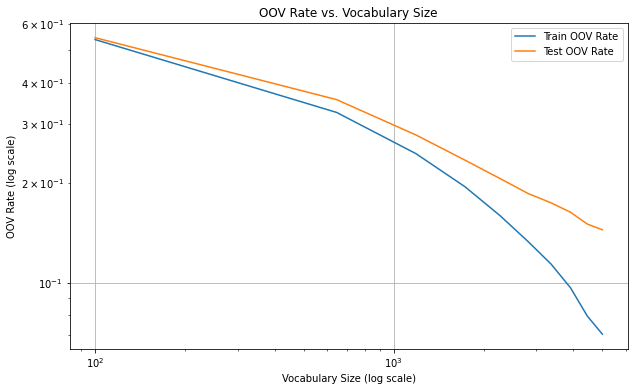

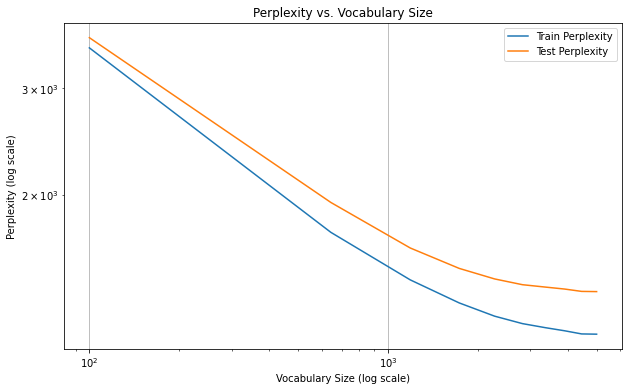

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import math

def OOV_rate(corpus: list[list[str]], vocab: set) -> float:

    total_words = sum(len(sentence) for sentence in corpus)
    oov_words = sum(word not in vocab for sentence in corpus for word in sentence)

    return oov_words / total_words


def calculate_word_probabilities(train_set: list[list[str]], vocab: set) -> dict:
    word_counts = Counter(word for sentence in train_set for word in sentence)
    total_count = sum(word_counts.values())
    word_probs = {word: word_counts[word] / total_count for word in vocab}
    word_probs['<unk>'] = 1 / total_count

    return word_probs


def calculate_perplexity(corpus: list[list[str]], vocab: set, word_probs: dict) -> float:
    total_words = sum(len(sentence) for sentence in corpus)
    log_prob_sum = 0
    for sentence in corpus:
        for word in sentence:
            if word in vocab:
                log_prob_sum += math.log2(word_probs[word])
            else:
                log_prob_sum += math.log2(word_probs['<unk>'])
    
    avg_log_prob = log_prob_sum / total_words
    perplexity = 2 ** (-avg_log_prob)
    
    return perplexity



preprocessed_corpus = load_and_preprocess_data()
train_set, test_set = train_test_split(preprocessed_corpus)

train_oov_rates = []
test_oov_rates = []

train_perplexities = []
test_perplexities = []

for top_n in np.linspace(100,5000,10,dtype=int):
    vocab = make_vocab(train_set, top_n)
    word_probs = calculate_word_probabilities(train_set, vocab)

    #Calculating OOV rates
    train_oov_rate = OOV_rate(train_set, vocab)
    test_oov_rate = OOV_rate(test_set, vocab)
    train_oov_rates.append(train_oov_rate)
    test_oov_rates.append(test_oov_rate)

    #Calculating perplexity
    train_perplexity = calculate_perplexity(train_set, vocab, word_probs)
    test_perplexity = calculate_perplexity(test_set, vocab, word_probs)
    train_perplexities.append(train_perplexity)
    test_perplexities.append(test_perplexity)

#Plot OOV_rate
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(100,5000,10,dtype=int), train_oov_rates, label='Train OOV Rate')
plt.plot(np.linspace(100,5000,10,dtype=int), test_oov_rates, label='Test OOV Rate')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Vocabulary Size (log scale)')
plt.ylabel('OOV Rate (log scale)')
plt.title('OOV Rate vs. Vocabulary Size')
plt.legend()
plt.grid(True)
plt.show()

#Plot perplexity
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(100,5000,10,dtype=int), train_perplexities, label='Train Perplexity')
plt.plot(np.linspace(100,5000,10,dtype=int), test_perplexities, label='Test Perplexity')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Vocabulary Size (log scale)')
plt.ylabel('Perplexity (log scale)')
plt.title('Perplexity vs. Vocabulary Size')
plt.legend()
plt.grid(True)
plt.show()

#raise NotImplementedError

#### Answers 4.7:  
It can be seen that with increase in vocabulary size, the OOV_rate decreases for both train and test set. And for every vocabulary size in the plot, Test OOV_rate is higher than train OOV_rate. And by increasing the vocabulary size, the gap between test OOV_rate and train OOV_rate increases. Perhaps it is because when the vocabulary size is small, it contains more common words that are common between train and test sets. However, when the vocabulary size increases, more spesific words from train set are added to vocabulary, increasing the gap between train and test OOV_rate.  
#### Answer 4.8:  
According to the second plot, perplexity of both train and test set decreases when vocabulary size increases.

# 5. Bonus: Cracking Caesar Cipher (3 Points)

**5.1 (0.5 point)** Load the files `alice_eng.txt`, `alice_fra.txt` and `alice_ger.txt`. Preprocess them by lowercasing and removing punctuation. Now replace every special language-specific character that is not a letter of the Latin alphabet with the special token '?', but keep the whitespaces.

**5.2 (0.5 point)** Perform a frequency analysis of the remaining characters and sort them in descending order. Plot a histogram for each language.

**5.3 (2 point)** You are given a text that was encrypted using the Caesar cipher (https://en.wikipedia.org/wiki/Caesar_cipher) with an unknown key. The original language is either English, French or German. Analyze the **letter** frequency of this text and then compute the Kullback-Leibler divergence against the three languages to find out which language it is.

"ul tyrdgzxefe uzk cr tyvezccv tfddv jz rcztv rmrzk gric? kflk yrlkvk le dfdvek rgi?j cr tyvezccv rmrzk uzjgrilrcztv tfekvdgcr cv tyrdgzxefe ule rzi gvejzw gveurek le zejkrek vjjrprek uv uvmzevi hlvcj ve ?krzvek cvj t?k?j vk tfddv cv tyrdgzxefe?krzk kflk ifeu vccv kiflmr cr hlvjkzfe wfik vdsriirjjrekv vewze vccv?kveuzk jvj sirj kflk rlkfli ve cvj rccfexvrek rlkrek hlv gfjjzscvvk uv tyrhlv drze vecvmr lev gvkzkv grikzv ul sfiu ul tyrdgzxefe drzekverek cvhlvc uvj uvlo jv uzkvccv vk vccv xizxefkr le gvl ul dfitvrl uv cr drze uifzkv gfli mfzi hlvc vwwvk zc gifulzirzk givjhlv rljjzk?k vccv iv?lk le tflg mzfcvek jflj cv dvekfe zc mverzk uv wirggvi tfekiv jfe gzvu tv siljhlv tyrexvdvek clz wzk xireu gvli drzj vccv tfdgizk hlzc ep rmrzk grj uv kvdgj ? gviuiv tri vccv uzdzelrzk irgzuvdvek vccv jv dzk ufet szve mzkv ? drexvi le gvl uv crlkiv dfitvrl jfe dvekfe ?krzk jz irggifty? uv jfe gzvu hlzc p rmrzk ? gvzev rjjvq uv gcrtv gfli hlvccv g?k flmizi cr sfltyv vccv p i?ljjzk vewze vk grimzek ? rmrcvi lev grikzv ul dfitvrl uv cr drze xrltyv"

In [25]:
#5.1 : Preprocessing text files
import string
def preprocess(filepath):
    with open(filepath, 'r', encoding='utf_8') as file:
        text = file.read()

    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Replacing special characters with '?'
    text = ''.join(c if c in string.ascii_lowercase + ' ' else '?' for c in text)
    return text

alice_eng = preprocess('data/alice_eng.txt')
alice_fra = preprocess('data/alice_fra.txt')
alice_ger = preprocess('data/alice_ger.txt')

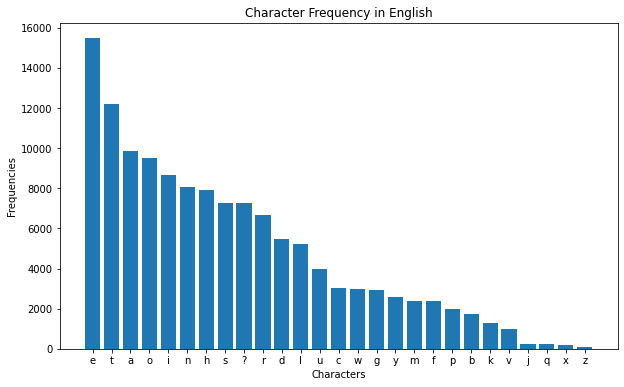

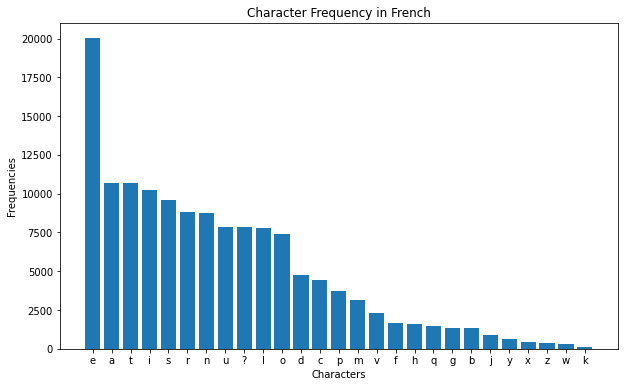

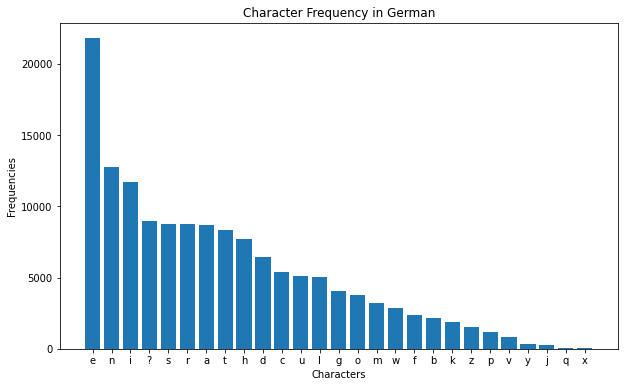

In [26]:
#5.2: Frequency analysis
import matplotlib.pyplot as plt
from collections import Counter

def Frequency_analysis(text, lang):
    counter = Counter(text)
    # Removing space
    if ' ' in counter:
        del counter[' ']
    
    #Sorting frequencies
    sorted_freq = sorted(counter.items(), key=lambda item: item[1], reverse=True)
    chars, freqs = zip(*sorted_freq)
    
    plt.figure(figsize=(10, 6))
    plt.bar(chars, freqs)
    plt.title(f'Character Frequency in {lang}')
    plt.xlabel('Characters')
    plt.ylabel('Frequencies')
    plt.show()

Frequency_analysis(alice_eng, 'English')
Frequency_analysis(alice_fra, 'French')
Frequency_analysis(alice_ger, 'German')

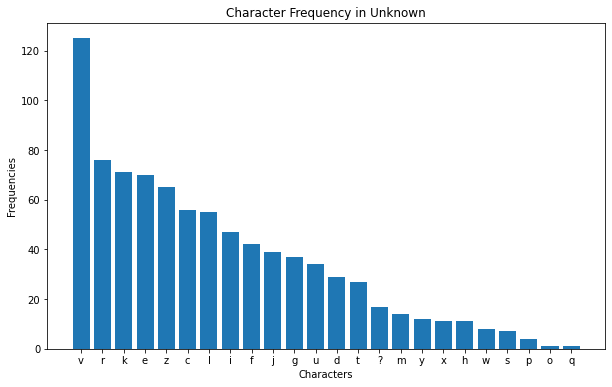

{'v': 125, 'r': 76, 'k': 71, 'e': 70, 'z': 65, 'c': 56, 'l': 55, 'i': 47, 'f': 42, 'j': 39, 'g': 37, 'u': 34, 'd': 29, 't': 27, '?': 17, 'm': 14, 'y': 12, 'x': 11, 'h': 11, 'w': 8, 's': 7, 'p': 4, 'o': 1, 'q': 1}
**********************
24
27
{'v': 125, 'r': 76, 'k': 71, 'e': 70, 'z': 65, 'c': 56, 'l': 55, 'i': 47, 'f': 42, 'j': 39, 'g': 37, 'u': 34, 'd': 29, 't': 27, '?': 17, 'm': 14, 'y': 12, 'x': 11, 'h': 11, 'w': 8, 's': 7, 'p': 4, 'o': 1, 'q': 1}
**********************
24
27
{'v': 125, 'r': 76, 'k': 71, 'e': 70, 'z': 65, 'c': 56, 'l': 55, 'i': 47, 'f': 42, 'j': 39, 'g': 37, 'u': 34, 'd': 29, 't': 27, '?': 17, 'm': 14, 'y': 12, 'x': 11, 'h': 11, 'w': 8, 's': 7, 'p': 4, 'o': 1, 'q': 1}
**********************
24
27
KL_divergence with English text:  0.03333077587513605
KL_divergence with French text:  0.021787585333461118
KL_divergence with German text:  0.023373187551170065


In [27]:
#5.3: 
from nltk import FreqDist
import math

def KL_divergence(t1,t2):
    #compute frequency distrubutions
    distr_freq1 = FreqDist(t1)
    if ' ' in distr_freq1:
        del distr_freq1[' ']
    distr_freq2 = FreqDist(t2)
    if ' ' in distr_freq2:
        del distr_freq2[' ']

    distr_freq1 = sorted(distr_freq1.items(), key=lambda item: item[1], reverse=True)
    distr_freq2 = sorted(distr_freq2.items(), key=lambda item: item[1], reverse=True)

    distr_freq1 = {key:value for key,value in distr_freq1}
    distr_freq2 = {key:value for key,value in distr_freq2}
    #check if we're working character level
    print(distr_freq1)
    print("**********************")
    #computing probabilities
    total_count1 = sum(distr_freq1.values())
    distr_prob1 = {word: count / total_count1 for word, count in distr_freq1.items()}

    total_count2 = sum(distr_freq2.values())
    distr_prob2 = {word: count / total_count2 for word, count in distr_freq2.items()}

    # Calculate KL divergence
    KL_divergence = 0
    list_val_1 = list(distr_prob1.values())
    list_val_2 = list(distr_prob2.values())
    print(len(list_val_1))
    print(len(list_val_2))
    for i in range(len(list_val_1)):
        KL_divergence += list_val_1[i] * math.log2(list_val_1[i]/ list_val_2[i])

    return KL_divergence


encrypted_text = "ul tyrdgzxefe uzk cr tyvezccv tfddv jz rcztv rmrzk gric? kflk yrlkvk le dfdvek rgi?j cr tyvezccv rmrzk uzjgrilrcztv tfekvdgcr cv tyrdgzxefe ule rzi gvejzw gveurek le zejkrek vjjrprek uv uvmzevi hlvcj ve ?krzvek cvj t?k?j vk tfddv cv tyrdgzxefe?krzk kflk ifeu vccv kiflmr cr hlvjkzfe wfik vdsriirjjrekv vewze vccv?kveuzk jvj sirj kflk rlkfli ve cvj rccfexvrek rlkrek hlv gfjjzscvvk uv tyrhlv drze vecvmr lev gvkzkv grikzv ul sfiu ul tyrdgzxefe drzekverek cvhlvc uvj uvlo jv uzkvccv vk vccv xizxefkr le gvl ul dfitvrl uv cr drze uifzkv gfli mfzi hlvc vwwvk zc gifulzirzk givjhlv rljjzk?k vccv iv?lk le tflg mzfcvek jflj cv dvekfe zc mverzk uv wirggvi tfekiv jfe gzvu tv siljhlv tyrexvdvek clz wzk xireu gvli drzj vccv tfdgizk hlzc ep rmrzk grj uv kvdgj ? gviuiv tri vccv uzdzelrzk irgzuvdvek vccv jv dzk ufet szve mzkv ? drexvi le gvl uv crlkiv dfitvrl jfe dvekfe ?krzk jz irggifty? uv jfe gzvu hlzc p rmrzk ? gvzev rjjvq uv gcrtv gfli hlvccv g?k flmizi cr sfltyv vccv p i?ljjzk vewze vk grimzek ? rmrcvi lev grikzv ul dfitvrl uv cr drze xrltyv"
#Analysing frequency of encrypted text
Frequency_analysis(encrypted_text,'Unknown')

#Calculating KL-divergence bewteen encrypted text and three other texts
Eng_kl_div = KL_divergence(encrypted_text,alice_eng)
Fre_kl_div = KL_divergence(encrypted_text,alice_fra)
Ger_kl_div = KL_divergence(encrypted_text,alice_ger)

print("KL_divergence with English text: ",Eng_kl_div)
print("KL_divergence with French text: ",Fre_kl_div)
print("KL_divergence with German text: ",Ger_kl_div)


According to KL_divergence scores, it appears that this text is in French language (having the lowest kl-divergence value).